In [443]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib as plt
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [444]:
fbdata = pd.read_csv('./fb5.csv', skipinitialspace=True, low_memory=False)
goog= pd.read_csv('./googl5.csv', skipinitialspace=True, low_memory=False)
aapl= pd.read_csv('./aapl5.csv', skipinitialspace=True, low_memory=False)
amzn= pd.read_csv('./amzn5.csv', skipinitialspace=True, low_memory=False)
tesla= pd.read_csv('./tsla5.csv', skipinitialspace=True, low_memory=False)
lll= pd.read_csv('./lll5.csv', skipinitialspace=True, low_memory=False)
rtn=pd.read_csv('./rtn.csv', skipinitialspace=True, low_memory=False)
ng=pd.read_csv('./ng5.csv', skipinitialspace=True, low_memory=False)

In [445]:
fbdata['Date'] = pd.to_datetime(fbdata['Date'])  ##tell pandas its a date
fbdata.set_index('Date', inplace=True)

fbdata['Year'] = fbdata.index.year
fbdata['Month'] = fbdata.index.month

goog['Date'] = pd.to_datetime(goog['Date'])  ##tell pandas its a date
goog.set_index('Date', inplace=True)

goog['Year'] = goog.index.year
goog['Month'] = goog.index.month

aapl['Date'] = pd.to_datetime(aapl['Date'])  ##tell pandas its a date
#aapl['Year'] = aapl.index.year
#aapl['Month'] = aapl.index.month
aapl.set_index('Date', inplace=True)

aapl['Year'] = aapl.index.year
aapl['Month'] = aapl.index.month

amzn['Date'] = pd.to_datetime(amzn['Date'])  ##tell pandas its a date
amzn.set_index('Date', inplace=True)
amzn['Year'] = amzn.index.year
amzn['Month'] = amzn.index.month


tesla['Date'] = pd.to_datetime(tesla['Date'])  ##tell pandas its a date
tesla.set_index('Date', inplace=True)
tesla['Year'] = tesla.index.year
tesla['Month'] = tesla.index.month

##I'm going to end up with like 20 of these, so I'm going to need to figure out a way to automate these steps

In [446]:
aapl['abspc_change']=(abs((aapl['Open'] - aapl['Close'])/aapl['Open'] ))*100
aapl['change']=(aapl['Open'] - aapl['Close'])
aapl['pc_change']=(aapl['Open'] - aapl['Close'])/aapl['Open']*100

tesla['abspc_change']=(abs((tesla['Open'] - tesla['Close'])/tesla['Open'] ))*100
tesla['change']=(tesla['Open'] - tesla['Close'])
tesla['pc_change']=(tesla['Open'] - tesla['Close'])/tesla['Open']*100

amzn['abspc_change']=(abs((amzn['Open'] - amzn['Close'])/amzn['Open'] ))*100
amzn['change']=(amzn['Open'] - amzn['Close'])
amzn['pc_change']=(amzn['Open'] - amzn['Close'])/amzn['Open']*100

fbdata['abspc_change']=(abs((fbdata['Open'] - fbdata['Close'])/fbdata['Open'] ))*100
fbdata['change']=(fbdata['Open'] - fbdata['Close'])
fbdata['pc_change']=(fbdata['Open'] - fbdata['Close'])/fbdata['Open']*100

lll['abspc_change']=(abs((lll['Open'] - lll['Close'])/lll['Open'] ))*100
lll['change']=(lll['Open'] - lll['Close'])
lll['pc_change']=(lll['Open'] - lll['Close'])/lll['Open']*100

ng['abspc_change']=(abs((ng['Open'] - ng['Close'])/ng['Open'] ))*100
ng['change']=(ng['Open'] - ng['Close'])
ng['pc_change']=(ng['Open'] - ng['Close'])/ng['Open']*100

In [447]:
lll['Date'] = pd.to_datetime(lll['Date'])  ##tell pandas its a date
lll.set_index('Date', inplace=True)
ng['Date'] = pd.to_datetime(ng['Date'])  ##tell pandas its a date
ng.set_index('Date', inplace=True)
ng['Month'] = ng.index.month
ng['Year'] = ng.index.year
rtn['Date'] = pd.to_datetime(rtn['Date'])  ##tell pandas its a date
rtn.set_index('Date', inplace=True)
lll['Year'] = lll.index.year
lll['Month'] = lll.index.month
rtn['Year'] = rtn.index.year
rtn['Month'] = rtn.index.month

In [448]:
goog['abspc_change']=(abs((goog['Open'] - goog['Close'])/goog['Open'] ))*100
goog['change']=(goog['Open'] - goog['Close'])
goog['pc_change']=(goog['Open'] - goog['Close'])/goog['Open']*100
rtn['abspc_change']=(abs((rtn['Open'] - rtn['Close'])/rtn['Open'] ))*100
rtn['change']=(rtn['Open'] - rtn['Close'])
rtn['pc_change']=(rtn['Open'] - rtn['Close'])/rtn['Open']*100

In [449]:
def up_down(df):
    updown=[]
    #df = df.copy(deep=True)
    for index, row in df.iterrows():

        if row['Open']>row['Close']:
            updown.append(1)
        elif row['Open']<row['Close']:
            updown.append(-1)
        else: updown.append(0)
    df['updown']=updown
    return df

In [450]:
def yup_down(df):   
    df['yupdown']=df['updown'].shift(1)
    df.yupdown.iloc[0]=1
    return df

In [451]:
up_down(tesla)
up_down(goog)
up_down(aapl)
up_down(lll)
up_down(amzn)
up_down(fbdata)
up_down(rtn)
up_down(ng)
up_down(fbdata)
#up_down(aapl)

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown
Date,,,,,,,,,,,
2017-06-28,150.92,153.47,149.86,153.24,16685284,2017,6,1.537238,-2.32,-1.537238,-1
2017-06-27,152.84,153.31,150.39,150.58,19360766,2017,6,1.478671,2.26,1.478671,1
2017-06-26,156.25,156.50,153.20,153.59,18049651,2017,6,1.702400,2.66,1.702400,1
2017-06-23,152.72,155.20,152.65,155.07,18026977,2017,6,1.538764,-2.35,-1.538764,-1
2017-06-22,153.01,154.55,152.91,153.40,13005535,2017,6,0.254885,-0.39,-0.254885,-1
2017-06-21,152.36,154.08,151.88,153.91,15039834,2017,6,1.017327,-1.55,-1.017327,-1
2017-06-20,152.88,153.84,152.21,152.25,14743853,2017,6,0.412088,0.63,0.412088,1
2017-06-19,151.71,153.57,151.71,152.87,19026462,2017,6,0.764617,-1.16,-0.764617,-1
2017-06-16,149.59,150.83,148.60,150.64,22882417,2017,6,0.701919,-1.05,-0.701919,-1


In [452]:
aapl['name']='apple'
tesla['name']='tesla'
lll['name']='l3'
rtn['name']='raytheon'
ng['name']='northrup'
goog['name']='google'
amzn['name']='amazon'
fbdata['name']='facebook'
aapl['name']='aapl'
aapl

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown,name
Date,,,,,,,,,,,,
2017-06-28,144.49,146.11,143.16,145.83,21982505,2017,6,0.927400,-1.34,-0.927400,-1,aapl
2017-06-27,145.01,146.16,143.62,143.73,24761891,2017,6,0.882698,1.28,0.882698,1,aapl
2017-06-26,147.17,148.28,145.38,145.82,25692361,2017,6,0.917307,1.35,0.917307,1,aapl
2017-06-23,145.13,147.16,145.11,146.28,35439389,2017,6,0.792393,-1.15,-0.792393,-1,aapl
2017-06-22,145.77,146.70,145.12,145.63,19106294,2017,6,0.096042,0.14,0.096042,1,aapl
2017-06-21,145.52,146.07,144.61,145.87,21265751,2017,6,0.240517,-0.35,-0.240517,-1,aapl
2017-06-20,146.87,146.87,144.94,145.01,24900073,2017,6,1.266426,1.86,1.266426,1,aapl
2017-06-19,143.66,146.74,143.66,146.34,32541404,2017,6,1.865516,-2.68,-1.865516,-1,aapl
2017-06-16,143.78,144.50,142.20,142.27,50361093,2017,6,1.050216,1.51,1.050216,1,aapl


In [453]:
yup_down(tesla)
yup_down(goog)
yup_down(aapl)
yup_down(lll)
yup_down(amzn)
yup_down(rtn)
yup_down(ng)
yup_down(fbdata)

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown,name,yupdown
Date,,,,,,,,,,,,,
2017-06-28,150.92,153.47,149.86,153.24,16685284,2017,6,1.537238,-2.32,-1.537238,-1,facebook,1.0
2017-06-27,152.84,153.31,150.39,150.58,19360766,2017,6,1.478671,2.26,1.478671,1,facebook,-1.0
2017-06-26,156.25,156.50,153.20,153.59,18049651,2017,6,1.702400,2.66,1.702400,1,facebook,1.0
2017-06-23,152.72,155.20,152.65,155.07,18026977,2017,6,1.538764,-2.35,-1.538764,-1,facebook,1.0
2017-06-22,153.01,154.55,152.91,153.40,13005535,2017,6,0.254885,-0.39,-0.254885,-1,facebook,-1.0
2017-06-21,152.36,154.08,151.88,153.91,15039834,2017,6,1.017327,-1.55,-1.017327,-1,facebook,-1.0
2017-06-20,152.88,153.84,152.21,152.25,14743853,2017,6,0.412088,0.63,0.412088,1,facebook,-1.0
2017-06-19,151.71,153.57,151.71,152.87,19026462,2017,6,0.764617,-1.16,-0.764617,-1,facebook,1.0
2017-06-16,149.59,150.83,148.60,150.64,22882417,2017,6,0.701919,-1.05,-0.701919,-1,facebook,-1.0


In [454]:
aapl['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(aapl['Close'])
goog['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(goog['Close'])
amzn['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(amzn['Close'])
tesla['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(tesla['Close'])
lll['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(lll['Close'])
rtn['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(rtn['Close'])
ng['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(ng['Close'])
fbdata['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(fbdata['Close'])
aapl['Nclose']= preprocessing.MinMaxScaler((0,1)).fit_transform(aapl['Close'])


C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature o

In [455]:
techs=pd.concat([amzn, goog, aapl, fbdata, tesla])  #leaving out netflix bc it work work.  
#techs= techs.groupby(techs.index).mean()
defs=pd.concat([rtn, ng, lll])
#defs=defs.groupby(defs.index).mean()

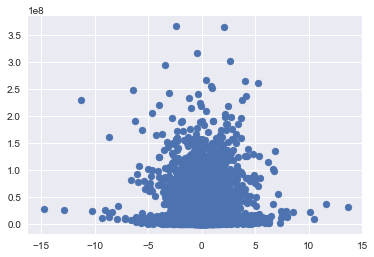

In [423]:

%matplotlib inline

plt.scatter(techs['pc_change'], (techs['Volume']))


In [424]:
amzn['pc_change'].describe()

count    1257.000000
mean       -0.012844
std         1.383198
min        -5.358491
25%        -0.886807
50%        -0.002099
75%         0.760559
max         8.561460
Name: pc_change, dtype: float64

In [425]:
aapl.describe()
aapl['Volume'].describe()
aaplhv=aapl[aapl.Volume > 8.387052e+07]  ##arbitrarily using the 
print aaplhv.head()
ishv=[]
for index, row in aapl.iterrows():
    if row['Volume']>=8.39e+7:
       ishv.append(1)
    else: ishv.append(0)


          Date    Open    High     Low   Close     Volume  abspc_change  \
102   1-Feb-17  127.03  130.49  127.01  128.75  111985040      1.354011   
197  15-Sep-16  113.86  115.73  113.49  115.57   90613177      1.501844   
198  14-Sep-16  108.73  113.03  108.60  111.77  112340318      2.795916   
232  27-Jul-16  104.26  104.35  102.75  102.95   92344820      1.256474   
295  27-Apr-16   96.00   98.71   95.68   97.82  113538389      1.895833   

     change  pc_change  updown  name    Nclose  
102   -1.72  -1.354011      -1  aapl  0.727345  
197   -1.71  -1.501844      -1  aapl  0.595953  
198   -3.04  -2.795916      -1  aapl  0.558070  
232    1.31   1.256474       1  aapl  0.470143  
295   -1.82  -1.895833      -1  aapl  0.419001  


In [426]:
aapl['ishv']=ishv
aapl.head()

,Date,Open,High,Low,Close,Volume,abspc_change,change,pc_change,updown,name,Nclose,ishv
0,28-Jun-17,144.49,146.11,143.16,145.83,21982505,0.927400,-1.34,-0.927400,-1,aapl,0.897617,0
1,27-Jun-17,145.01,146.16,143.62,143.73,24761891,0.882698,1.28,0.882698,1,aapl,0.876682,0
2,26-Jun-17,147.17,148.28,145.38,145.82,25692361,0.917307,1.35,0.917307,1,aapl,0.897518,0
3,23-Jun-17,145.13,147.16,145.11,146.28,35439389,0.792393,-1.15,-0.792393,-1,aapl,0.902103,0
4,22-Jun-17,145.77,146.70,145.12,145.63,19106294,0.096042,0.14,0.096042,1,aapl,0.895624,0


In [456]:
defs[['Close']].resample('A').apply(['diff'])

,Close
,diff
Date,
2012-07-03,NaN
2012-07-03,7.45
2012-07-03,10.51
2012-07-05,-18.38
2012-07-05,7.86
2012-07-05,10.01
2012-07-06,-18.06
2012-07-06,7.59


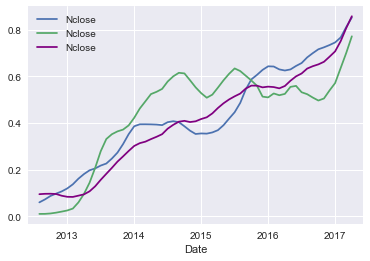

In [457]:
ax=goog[['Nclose']].resample('M').mean().rolling(window=5, center=True).mean().plot()
tesla[['Nclose']].resample('M').mean().rolling(window=5, center=True).mean().plot(ax=ax)
techs[['Nclose']].resample('M').mean().rolling(window=5, center=True).mean().plot(ax=ax, color='purple')

In [429]:
####Looking at the day before

a=aapl['Volume'].diff(periods=1) ###can i easily append this onto data?
b=goog['pc_change'].diff(periods=1)
a[0]=0
b[0]=0 # imputing no change for day 1
stats.pearsonr(goog['pc_change'], b)

(0.70563632098345452, 5.4599772920341733e-190)

In [430]:
c=ng['Volume'].diff(periods=1) ###can i easily append this onto data?
d=ng['pc_change'].diff(periods=1)
c[0]=0
d[0]=0 # imputing no change for day 1
stats.pearsonr(ng['Volume'], c)

(0.46971380748993774, 5.6011534490152275e-70)

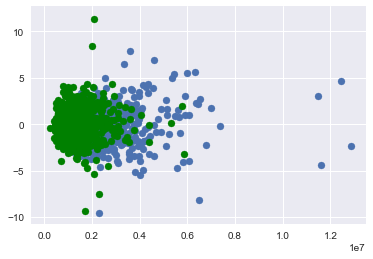

In [431]:
ax=plt.scatter(goog['Volume'],b)
plt.scatter(ng['Volume'], d, color='green')

In [432]:
stats.pearsonr(goog['Volume'], b)

(0.036772404408331655, 0.19261586905045669)

In [458]:

#data['Year'].head
import seaborn as sb
%matplotlib inline

In [459]:
c=amzn['Volume'].diff(periods=1) ###can i easily append this onto data?
d=amzn['pc_change'].diff(periods=1)
e=tesla['Close'].diff(periods=1)

c[0]=0
d[0]=0
e[0]=0


In [460]:
stats.pearsonr(amzn['pc_change'], d)

(0.69755694928394263, 6.7179220096429385e-184)

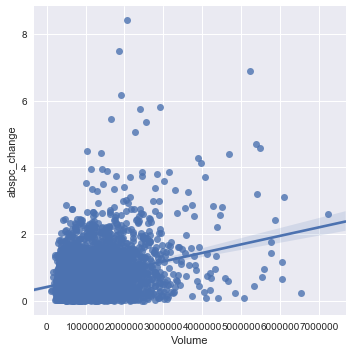

In [461]:
sb.lmplot(x="Volume", y="abspc_change", data=defs)

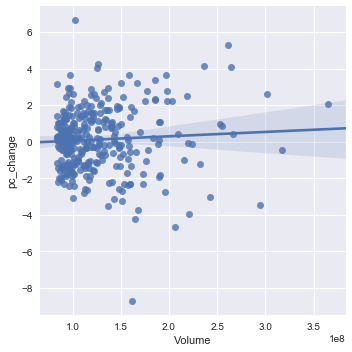

In [462]:
sb.lmplot(x="Volume", y="pc_change", data=aaplhv)

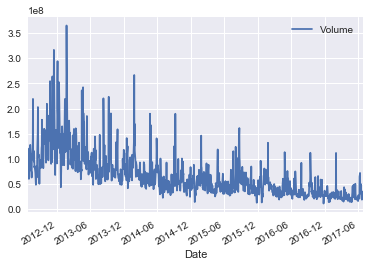

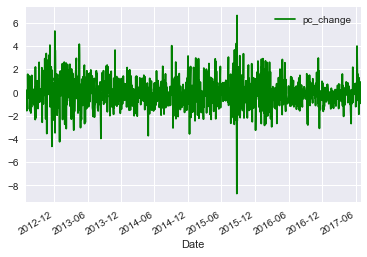

In [463]:
ax=aapl[['Volume']].plot()
aapl[['pc_change']].plot( color='green')



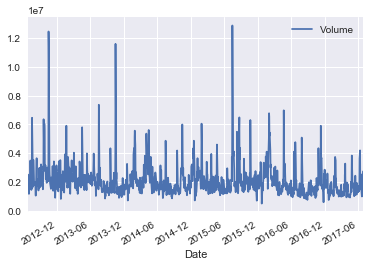

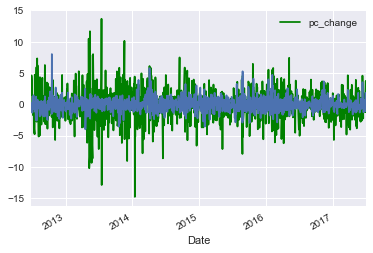

In [464]:
ax=goog[['Volume']].plot()  ###defense company 1
ax2=tesla[['pc_change']].plot( color='green')
#ng[['Volume']].plot(ax=ax)  ###defense company 2
goog['pc_change'].plot()



In [465]:
from scipy import stats
#stats.pearsonr(ng['Volume'], lll['Volume']) #.24, 2.59e-18
               
stats.pearsonr(goog['pc_change'], aapl['pc_change'])



(0.40043681737486442, 1.3182588318624735e-49)

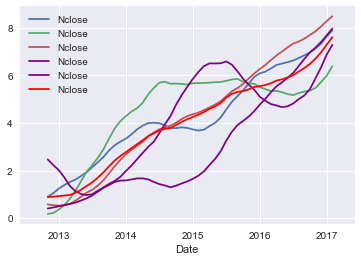

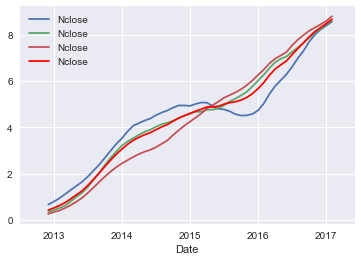

In [466]:
ax=goog[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot()
tesla[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax)
fbdata[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax)
amzn[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax, color='purple')
aapl[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax, color='purple')
techs[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax, color='red')

ax2=lll[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot()
rtn[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax2, )
ng[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax2,)
defs[['Nclose']].resample('M').mean().rolling(window=10, center=True).sum().plot(ax=ax2, color='red')


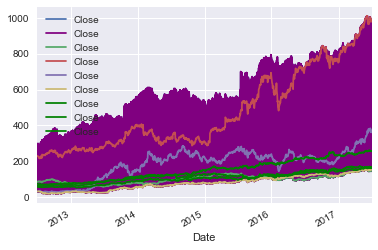

In [468]:

ax=goog[['Close']].plot()
techs[['Close']].plot(ax=ax, color='purple')
aapl[['Close']].plot(ax=ax)
amzn[['Close']].plot(ax=ax)
tesla[['Close']].plot(ax=ax)
fbdata[['Close']].plot(ax=ax)
lll[['Close']].plot(ax=ax, color='green')
ng[['Close']].plot(ax=ax, color='green')
rtn[['Close']].plot(ax=ax, color='green')




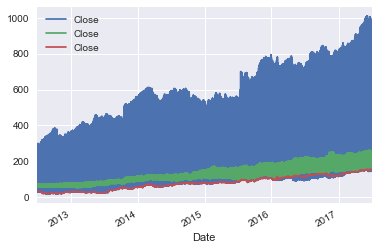

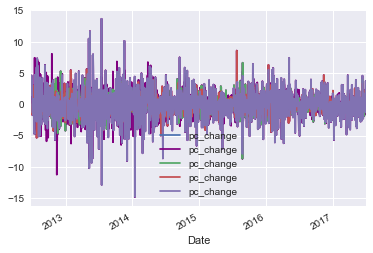

In [469]:
ax=techs[['Close']].plot()
defs[['Close']].plot(ax=ax)
fbdata[['Close']].plot(ax=ax)
#ax=fbdata[['pc_change']].plot()
ax=goog[['pc_change']].plot()
techs[['pc_change']].plot(ax=ax, color='purple')
aapl[['pc_change']].plot(ax=ax)
amzn[['pc_change']].plot(ax=ax)
tesla[['pc_change']].plot(ax=ax)
#lll[['pc_change']].plot(ax=ax, color='green')
#ng[['pc_change']].plot(ax=ax, color='green')
#rtn[['pc_change']].plot(ax=ax, color='green')

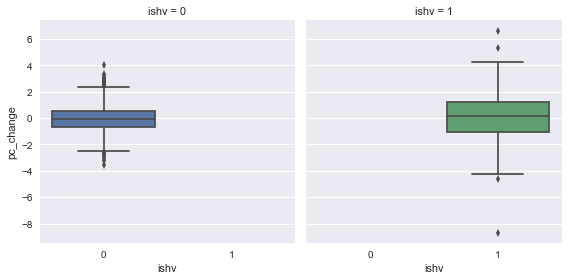

In [261]:
sb.factorplot(
    col='ishv',
    x='ishv',
    y='pc_change',
    data=aapl,
    kind='box',
    
)

In [369]:
techs.corr()

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown,yupdown,Nclose
Open,1.000000,0.999924,0.999885,0.999823,-0.482976,0.384046,-0.028770,-0.177552,0.024661,0.009309,0.004293,0.004246,0.356303
High,0.999924,1.000000,0.999866,0.999910,-0.483748,0.383988,-0.029067,-0.173663,0.015951,0.002509,-0.001541,0.004644,0.356019
Low,0.999885,0.999866,1.000000,0.999923,-0.482586,0.384175,-0.028510,-0.182815,0.013275,0.001561,-0.002083,0.004333,0.356672
Close,0.999823,0.999910,0.999923,1.000000,-0.483234,0.384212,-0.028969,-0.178480,0.005822,-0.004425,-0.007245,0.004759,0.356569
Volume,-0.482976,-0.483748,-0.482586,-0.483234,1.000000,-0.252083,0.012429,0.140875,0.006338,0.011145,0.001711,0.003381,-0.173099
Year,0.384046,0.383988,0.384175,0.384212,-0.252083,1.000000,-0.284536,-0.152925,-0.002949,-0.015283,-0.023799,-0.023051,0.858507
Month,-0.028770,-0.029067,-0.028510,-0.028969,0.012429,-0.284536,1.000000,-0.007712,0.010166,0.003572,-0.005632,-0.004529,-0.063087
abspc_change,-0.177552,-0.173663,-0.182815,-0.178480,0.140875,-0.152925,-0.007712,1.000000,0.046547,0.004551,0.004303,0.024211,-0.144542
change,0.024661,0.015951,0.013275,0.005822,0.006338,-0.002949,0.010166,0.046547,1.000000,0.728868,0.612253,-0.027174,-0.008711
pc_change,0.009309,0.002509,0.001561,-0.004425,0.011145,-0.015283,0.003572,0.004551,0.728868,1.000000,0.701811,-0.046802,-0.023647


C:\Users\ewa\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  app.launch_new_instance()


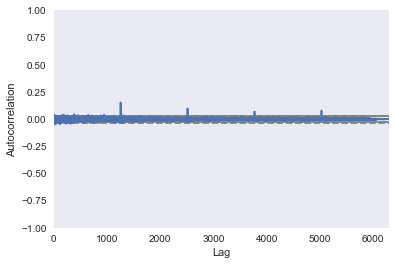

In [470]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(techs['pc_change'])

In [365]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [366]:
n = len(techs.Close)

#train = techs.Close[:int(.75*n)]
#test = techs.Close[int(.75*n):]

In [471]:
'''
model = sm.tsa.ARIMA(train, (1, 1, 0)).fit()

predictions = model.predict(
    '2012-06-29',
    '2016-01-29',
    dynamic=True, 
)

#print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()
model.resid.plot()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-471-6237ccb1381b>, line 12)

In [368]:
techs

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown,name,yupdown,Nclose
Date,,,,,,,,,,,,,,
2017-06-28,978.55,990.68,969.21,990.33,3737567,2017,6,1.203822,-11.78,-1.203822,-1,amazon,1.0,0.973605
2017-06-27,990.69,998.80,976.00,976.78,3782389,2017,6,1.404072,13.91,1.404072,1,amazon,-1.0,0.956582
2017-06-26,1008.50,1009.80,992.00,993.98,3386157,2017,6,1.439762,14.52,1.439762,1,amazon,1.0,0.978190
2017-06-23,1002.54,1004.62,998.02,1003.74,2879145,2017,6,0.119696,-1.20,-0.119696,-1,amazon,1.0,0.990452
2017-06-22,1002.23,1006.96,997.20,1001.30,2253433,2017,6,0.092793,0.93,0.092793,1,amazon,-1.0,0.987387
2017-06-21,998.70,1002.72,992.65,1002.23,2922473,2017,6,0.353459,-3.53,-0.353459,-1,amazon,1.0,0.988555
2017-06-20,998.00,1004.88,992.02,992.59,4076828,2017,6,0.542084,5.41,0.542084,1,amazon,-1.0,0.976444
2017-06-19,1017.00,1017.00,989.90,995.17,5043408,2017,6,2.146509,21.83,2.146509,1,amazon,1.0,0.979685
2017-06-16,996.00,999.75,982.00,987.71,11472662,2017,6,0.832329,8.29,0.832329,1,amazon,1.0,0.970313


In [89]:
model=sm.tsa.ARMA(techs['Close'],	(1,	1)).fit()
model.summary()	

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1259
Model:                     ARMA(1, 1)   Log Likelihood               -4174.780
Method:                       css-mle   S.D. of innovations              6.650
Date:                Mon, 10 Jul 2017   AIC                           8357.560
Time:                        04:35:05   BIC                           8378.112
Sample:                    06-28-2012   HQIC                          8365.284
                         - 06-29-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         234.8881    109.425      2.147      0.032      20.418     449.358
ar.L1.Close     0.9989      0.001    861.668      0.000       0.997       1.001
ma.L1.Close    -0.0150      0.044     -0.340      0.734      -0.101       0.071
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           +0.0000j            1.0011            0.0000
MA.1           66.6301           +0.0000j           66.6301            0.0000
-----------------------------------------------------------------------------
"""

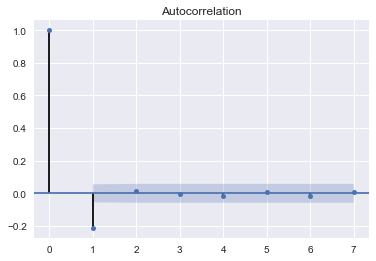

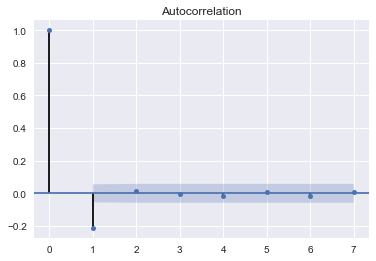

In [96]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(model.resid, lags=)

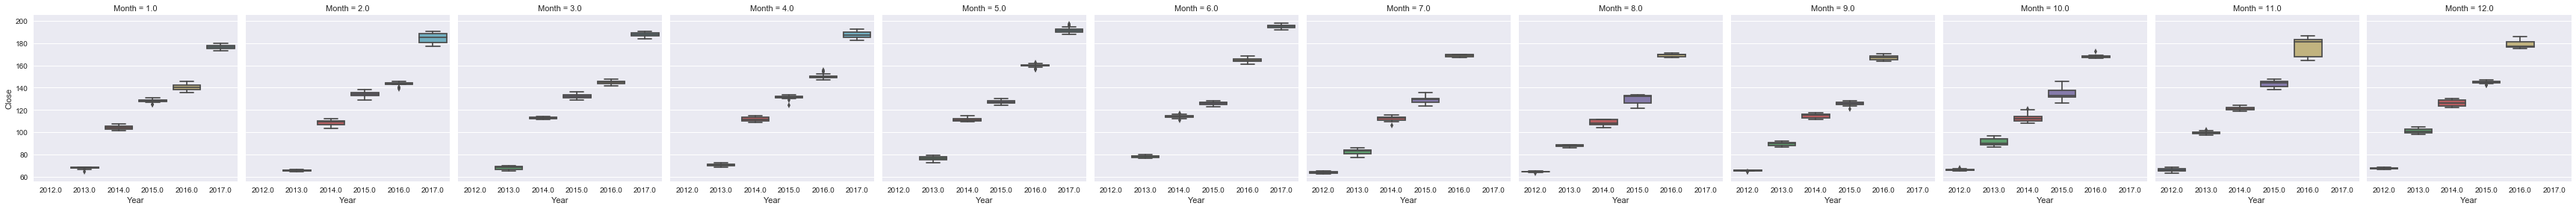

In [45]:
sb.factorplot(
    col='Month',
    x='Year',
    y='Close',
    data=defs,
    kind='box',
    
)

In [472]:
import scipy.cluster.vq
import scipy.stats
#K = scipy.cluster.vq.kmeans(techs,5)
#VQ = scipy.cluster.vq.vq(techs, K[0])
#groups=VQ[0]

names=techs.columns.values

In [473]:
names

array(['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month',
       'abspc_change', 'change', 'pc_change', 'updown', 'name', 'yupdown',
       'Nclose'], dtype=object)

In [474]:
alldata=pd.concat([techs, defs])

In [532]:


def set_colors(labels, colors='rgbykcmrgbykmcwbygcyrgbykcmrgbykmcwbygcyrgbykcmrgbykmcwbygcyrgbykcmrgbykmcwbygcy'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels


In [598]:
from sklearn.cluster import DBSCAN
from collections import Counter

estimator = DBSCAN(eps=.99, min_samples=12)
X = alldata[['Nclose', 'Close' ,'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
#(alldata['pc_change']).plot(c=colors)
#plt.xlabel("x")
#plt.ylabel("y")
#plt.show()


Counter({-1: 3755, 8: 2676, 10: 2048, 9: 331, 31: 144, 11: 141, 15: 117, 14: 95, 7: 81, 6: 78, 4: 48, 22: 35, 24: 33, 3: 30, 17: 26, 21: 26, 23: 26, 2: 24, 12: 21, 26: 20, 25: 19, 37: 19, 29: 18, 13: 17, 33: 17, 18: 16, 27: 16, 34: 16, 20: 15, 28: 15, 0: 14, 1: 14, 16: 14, 19: 14, 36: 13, 5: 12, 30: 12, 32: 12, 35: 12, 38: 12, 39: 6})


In [599]:
counts=Counter(labels)
print(counts)

Counter({-1: 3755, 8: 2676, 10: 2048, 9: 331, 31: 144, 11: 141, 15: 117, 14: 95, 7: 81, 6: 78, 4: 48, 22: 35, 24: 33, 3: 30, 17: 26, 21: 26, 23: 26, 2: 24, 12: 21, 26: 20, 25: 19, 37: 19, 29: 18, 13: 17, 33: 17, 18: 16, 27: 16, 34: 16, 20: 15, 28: 15, 0: 14, 1: 14, 16: 14, 19: 14, 36: 13, 5: 12, 30: 12, 32: 12, 35: 12, 38: 12, 39: 6})


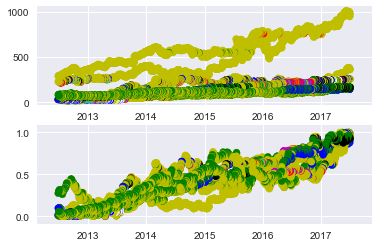

In [600]:
import pylab
#from matplotlib import colors
plt.subplot(2,1,1)
plt.scatter(alldata.index, alldata['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(alldata.index, alldata['Nclose'],c=colors)


Counter({0: 8413, 1: 1645})


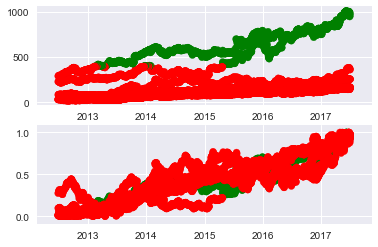

In [605]:
from sklearn import metrics
from sklearn.cluster import KMeans 
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = alldata[[ 'Close' ,'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.subplot(2,1,1)
plt.scatter(alldata.index, alldata['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(alldata.index, alldata['Nclose'],c=colors)

plt.show()

Counter({2: 2968, 8: 2172, 6: 1315, 0: 1249, 1: 612, 7: 548, 4: 534, 5: 403, 3: 257})


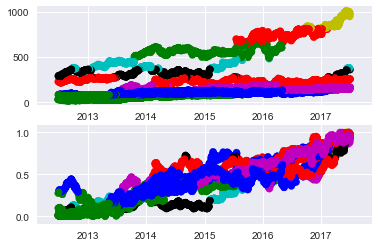

In [607]:
from sklearn import metrics
from sklearn.cluster import KMeans 
# Fit a k-means estimator
estimator = KMeans(n_clusters=9)
X = alldata[[ 'Close' ,'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.subplot(2,1,1)
plt.scatter(alldata.index, alldata['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(alldata.index, alldata['Nclose'],c=colors)

plt.show()